<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem" data-toc-modified-id="Problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Creating-the-Dataset" data-toc-modified-id="Creating-the-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Creating the Dataset</a></span></li><li><span><a href="#Checking-Data-Integrity" data-toc-modified-id="Checking-Data-Integrity-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Checking Data Integrity</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analysis</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Train/Test/Split" data-toc-modified-id="Train/Test/Split-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Train/Test/Split</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#ERROR" data-toc-modified-id="ERROR-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>ERROR</a></span></li><li><span><a href="#Bodyfat" data-toc-modified-id="Bodyfat-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Bodyfat</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Linear-Regresssion" data-toc-modified-id="Linear-Regresssion-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Linear Regresssion</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#XgB-Regressor" data-toc-modified-id="XgB-Regressor-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>XgB Regressor</a></span></li></ul></li></ul></div>

## Problem

   Knowing one's total proportion of body fat is beneficial both from a health standpoint as well as a cosmetic standpoint. The two most accurate forms of this measurement are through use of a DEXA scanner and/or hydrostatic weighing. Both of those processes are expense and time consuming for the average individual. By using information about patients that have performed those tests, we may be able to find a commonality among these variables that will assist us in making a more affordable and accessible, but still fairly accurate, estimation of a persons body fat percentage. Current algorithms based on easily accessed data are considered only slightly accurate across the population as a whole, but wildly inaccurate to an individual. 

In [1]:
## Based on the research I have acquired, frame size has a positive correlation to TBF and FFM... Can we improve the current 
## measure of body fat based on bmi or specific measurements by incorporating the frame size into those calculations?

## Introduction

The data set acquired is taken from 252 adult male samples. That being said, any predictions created from it, will likely only apply to the adult male population. I believe it potentially important to create separate models based on gender, and possibly other unforeseen factors to arrive at an estimation of the desired accuracy based on the individual rather than across the population. Each sample in this set has had their total body fat measured through hydrostatic weighing. Density is the resulting column (X*X). With that value it has been plugged into two separate formulas to calculate the proportion (Siri & Brozek) Brozek has shown to be more accurate used on samples that have not had any recent weight fluctuations. 

(I will be using the Brozek Formula, after reviewing the data, Siri dipped into the negatives)

## Creating the Dataset

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import math
import numpy as np
import seaborn as sn
pd.set_option('display.max_columns', None)

In [304]:
#Importing the main dataset
df = pd.read_csv('Bodyfat.csv')

In [305]:
#Importing an additional dataset with more features to add to the original
df2 = pd.read_csv('fat.dat.txt', header=None, delimiter='\s+')

In [306]:
#Combining extra features from the additional df (df2)
df['Brozek'] = df2[1]
df['BMI'] = df2[7]
df['FFM_Brozek'] = df2[8]

In [300]:
df.head()

Density  bodyfat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   
1     1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  Brozek   BMI  FFM_Brozek  
0     59.0  37.3   21.9    32.0     27.4   17.1    12.6  23.7       134.9  
1     58.7  37.3   23.4    30.5     28.9   18.2     6.9  23.4       161.3  
2     59.6  38.9   24.0    28.8     25.2   16.6    24.6  24.7       116.0  
3     60.1  37.3   22.8    32.4     29.4   18.2    10.9  24.9       164.7  
4     63.2  42.2   24.0    32.2     27.7   17.7    27.8  25.6       133.1  
..     ...   ...    ...     ...      ...    ...     ...   ...         ...  
247   49.6  34.8   21.5    25.6     25.7   18.5    11.5  21.1       118.9  
248   59.6  40.8   23.2    35.2     28.6   20.1    32.3  29.1       136.1  
249   60.3  37.3   21.5    31.3     27.2   18.0    28.3  30.2       133.9  
250   56.0  41.6   22.7    30.5     29.4   19.8    25.3  27.0       142.6  
251   59.3  42.2   24.6    33.7     30.0   20.9    30.7  29.8       143.7  

[252 rows x 18 columns]

In [307]:
#Renaming the bodyfat column to Siri to differenciate it from Brozek
df['Siri'] = df['bodyfat']
df.drop(['bodyfat'], axis=1, inplace=True)

In [302]:
df.head()

Density  bodyfat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   
1     1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  Brozek   BMI  FFM_Brozek  \
0     59.0  37.3   21.9    32.0     27.4   17.1    12.6  23.7       134.9   
1     58.7  37.3   23.4    30.5     28.9   18.2     6.9  23.4       161.3   
2     59.6  38.9   24.0    28.8     25.2   16.6    24.6  24.7       116.0   
3     60.1  37.3   22.8    32.4     29.4   18.2    10.9  24.9       164.7   
4     63.2  42.2   24.0    32.2     27.7   17.7    27.8  25.6       133.1   
..     ...   ...    ...     ...      ...    ...     ...   ...         ...   
247   49.6  34.8   21.5    25.6     25.7   18.5    11.5  21.1       118.9   
248   59.6  40.8   23.2    35.2     28.6   20.1    32.3  29.1       136.1   
249   60.3  37.3   21.5    31.3     27.2   18.0    28.3  30.2       133.9   
250   56.0  41.6   22.7    30.5     29.4   19.8    25.3  27.0       142.6   
251   59.3  42.2   24.6    33.7     30.0   20.9    30.7  29.8       143.7   

     Siri  
0    12.3  
1     6.1  
2    25.3  
3    10.4  
4    28.7  
..    ...  
247  11.0  
248  33.6  
249  29.3  
250  26.0  
251  31.9  

[252 rows x 19 columns]

## Checking Data Integrity

The minimum essential amount of body fat required for life in a male is 2-5% 

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Density     252 non-null    float64
 1   bodyfat     252 non-null    float64
 2   Age         252 non-null    int64  
 3   Weight      252 non-null    float64
 4   Height      252 non-null    float64
 5   Neck        252 non-null    float64
 6   Chest       252 non-null    float64
 7   Abdomen     252 non-null    float64
 8   Hip         252 non-null    float64
 9   Thigh       252 non-null    float64
 10  Knee        252 non-null    float64
 11  Ankle       252 non-null    float64
 12  Biceps      252 non-null    float64
 13  Forearm     252 non-null    float64
 14  Wrist       252 non-null    float64
 15  Brozek      252 non-null    float64
 16  BMI         252 non-null    float64
 17  FFM_Brozek  252 non-null    float64
 18  Siri        252 non-null    float64
 19  Error       252 non-null    f

In [337]:
#creating a list and function to gather all potential outliers and frame for quicker review
review_list = []

def list_creator(list):
    for x in list:
        review_list.append(x)
    return review_list

In [310]:
for x in list(df.columns):
    print(x, df[x].max(), df[x].min(), round(df[x].mean(), 2))    
#Density too High (cannot be over 1.1)
#Height too low (2 ft. 5.5 inches)
#Brozek too low (cannot have 0% bodyfat)
#Siri too low (cannot have 0% bodyfat)


Density 1.1089 0.995 1.06
Age 81 22 44.88
Weight 363.15 118.5 178.92
Height 77.75 29.5 70.15
Neck 51.2 31.1 37.99
Chest 136.2 79.3 100.82
Abdomen 148.1 69.4 92.56
Hip 147.7 85.0 99.9
Thigh 87.3 47.2 59.41
Knee 49.1 33.0 38.59
Ankle 33.9 19.1 23.1
Biceps 45.0 24.8 32.27
Forearm 34.9 21.0 28.66
Wrist 21.4 15.8 18.23
Brozek 45.1 0.0 18.94
BMI 48.9 18.1 25.44
FFM_Brozek 240.5 105.9 143.71
Siri 47.5 0.0 19.15


In [ ]:
for x in list(df.columns):
    fig, ax = plt.subplots()
    plt.scatter(df[x], df[x])
    plt.title(x)
    for i in df.index:
        ax.annotate(i, (df[x][i], df[x][i]))
    plt.gcf().set_size_inches((20, 10))   
    plt.show();

In [338]:
# 181, 215, 191, 171, 78, 38, 41, 30, 85, 40, 168, 35 adding to list to be reviewed
list1 = [181, 215, 191, 171, 78, 38, 41, 30, 85, 40, 168, 35]
list_creator(list1)

[181, 215, 191, 171, 78, 38, 41, 30, 85, 40, 168, 35]

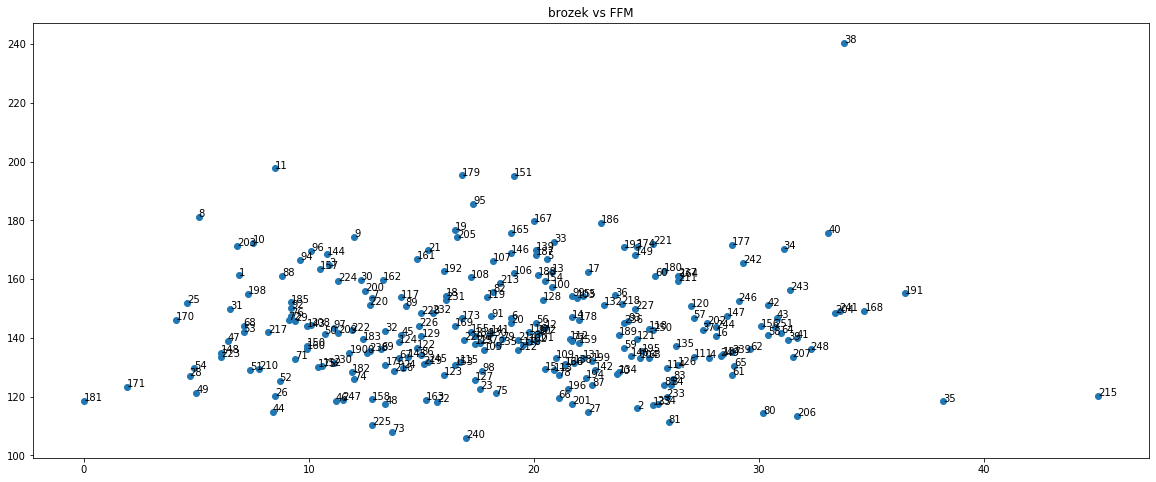

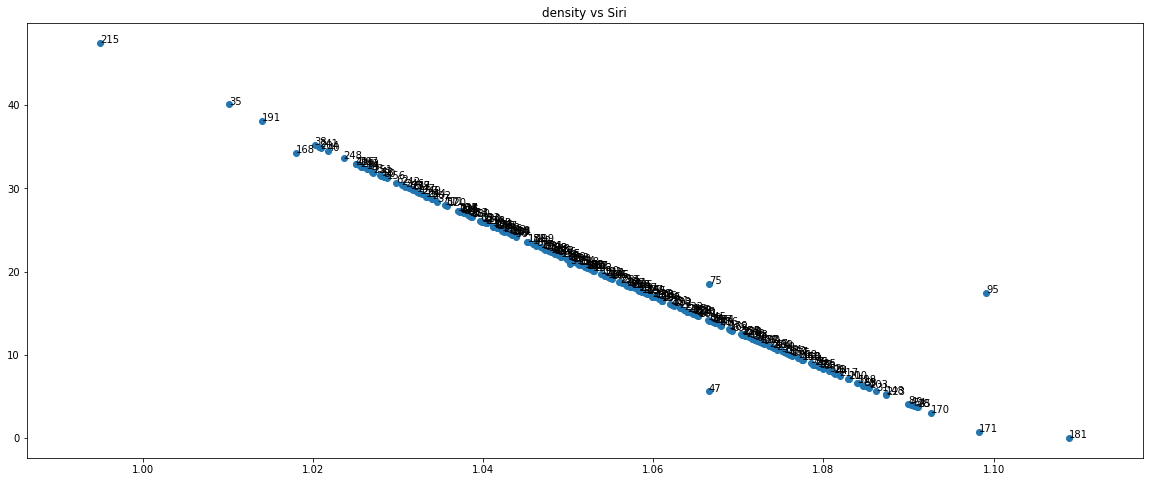

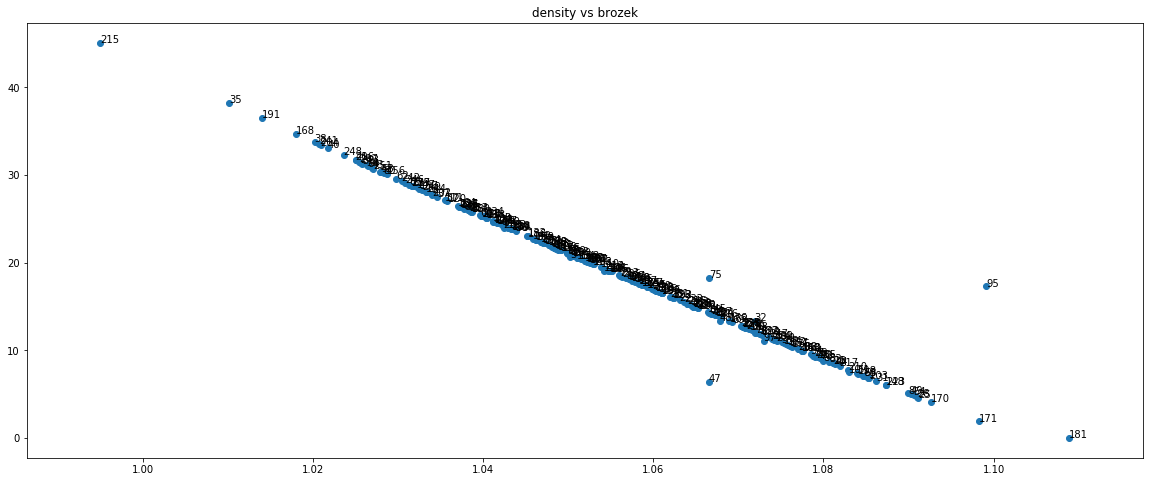

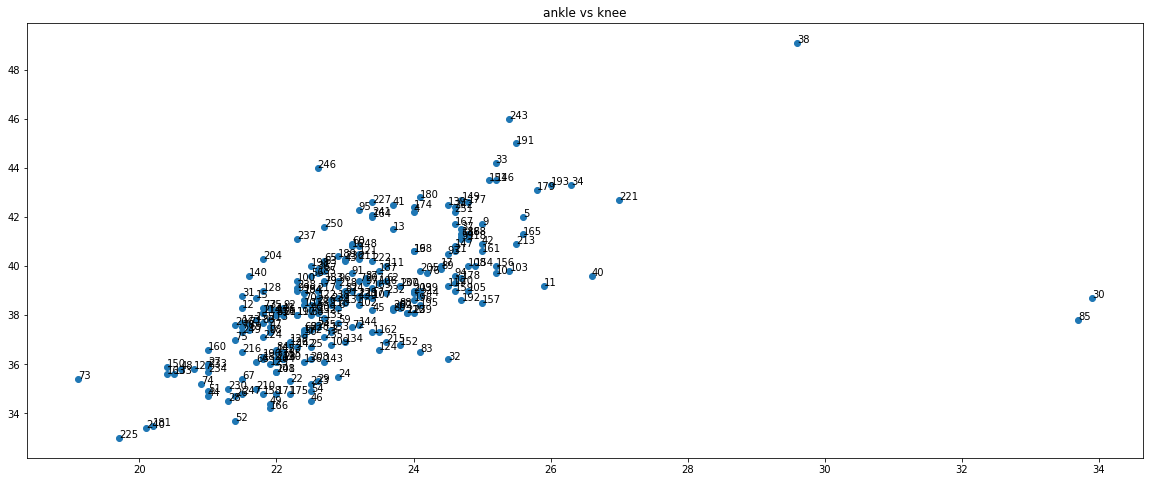

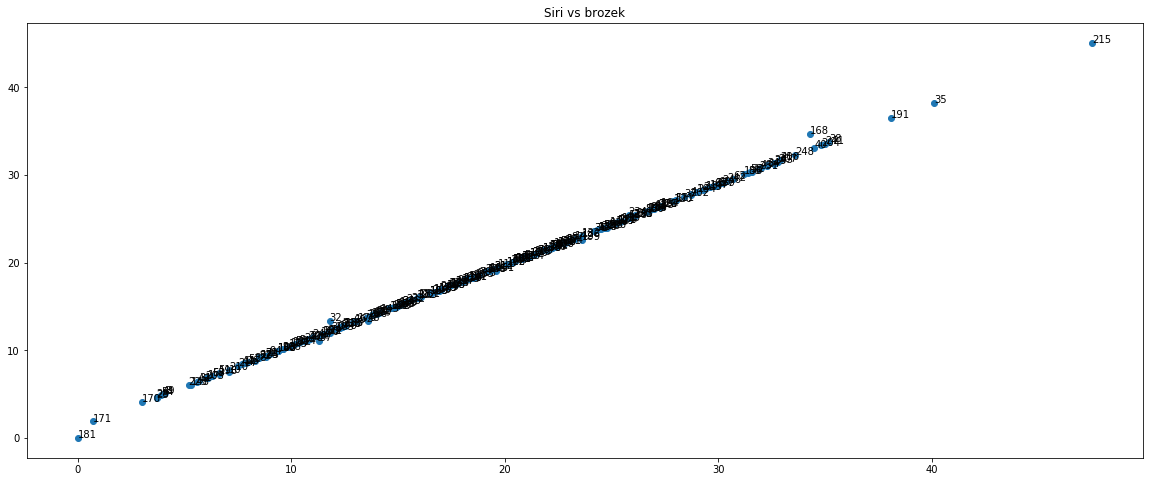

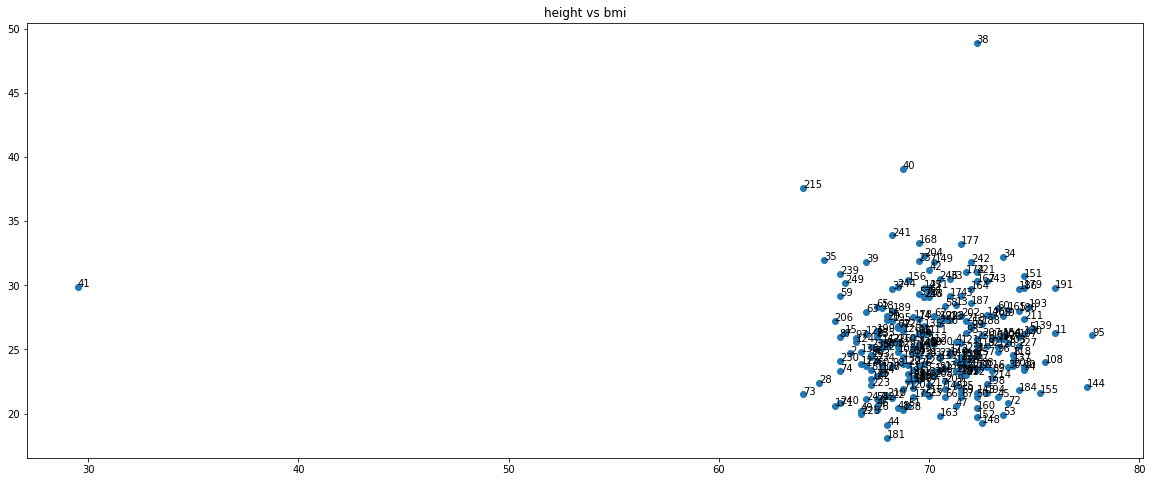

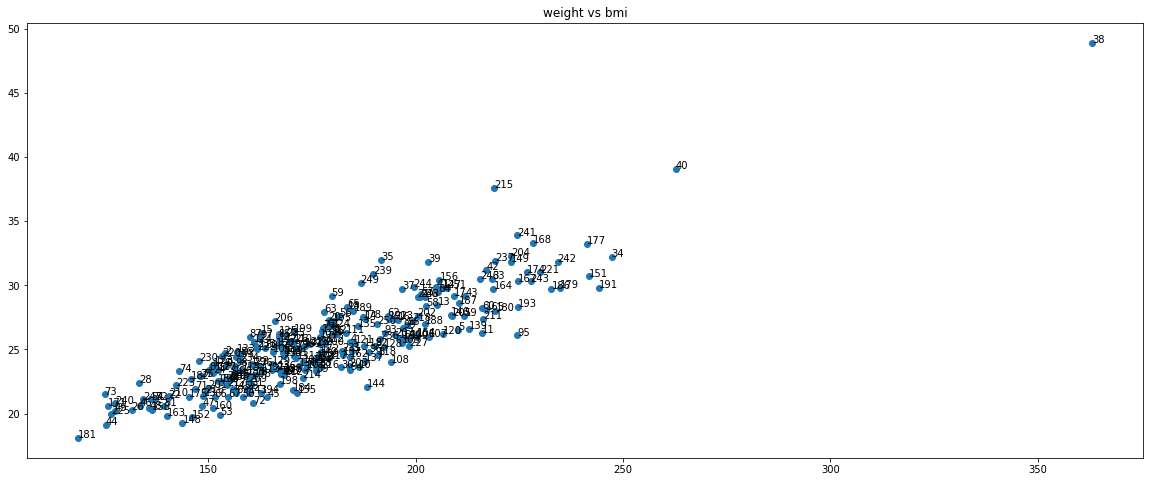

In [346]:
columns = [(df['Brozek'], df['FFM_Brozek']), (df['Density'], df['Siri']), (df['Density'], df['Brozek']),
          (df['Ankle'], df['Knee']), (df['Siri'], df['Brozek']), (df['Height'], df['BMI']), (df['Weight'], df['BMI'])]
column_names = ['brozek vs FFM', 'density vs Siri', 'density vs brozek', 'ankle vs knee', 'Siri vs brozek', 'height vs bmi', 'weight vs bmi']

total = 0
for z in columns:
    total2 = 0
    list1 = []
    list2 = []
    for i in z[0]:
        list1.append(i)
    for i in z[1]:
        list2.append(i)
    list3 = zip(list1, list2)
    fig, ax = plt.subplots(figsize=(20,8))
    plt.title(column_names[total])
    total += 1
    ax.scatter(z[0], z[1])
    for x,y in list3:
        ax.annotate(total2, (x, y))
        total2 += 1
    plt.show();

In [347]:
#38, 215, 95, 47 add to review list
list2 = [38, 215, 95, 47, 168, 32]
list_creator(list2)

[181,
 215,
 191,
 171,
 78,
 38,
 41,
 30,
 85,
 40,
 168,
 35,
 38,
 215,
 95,
 47,
 38,
 215,
 95,
 47,
 168,
 32]

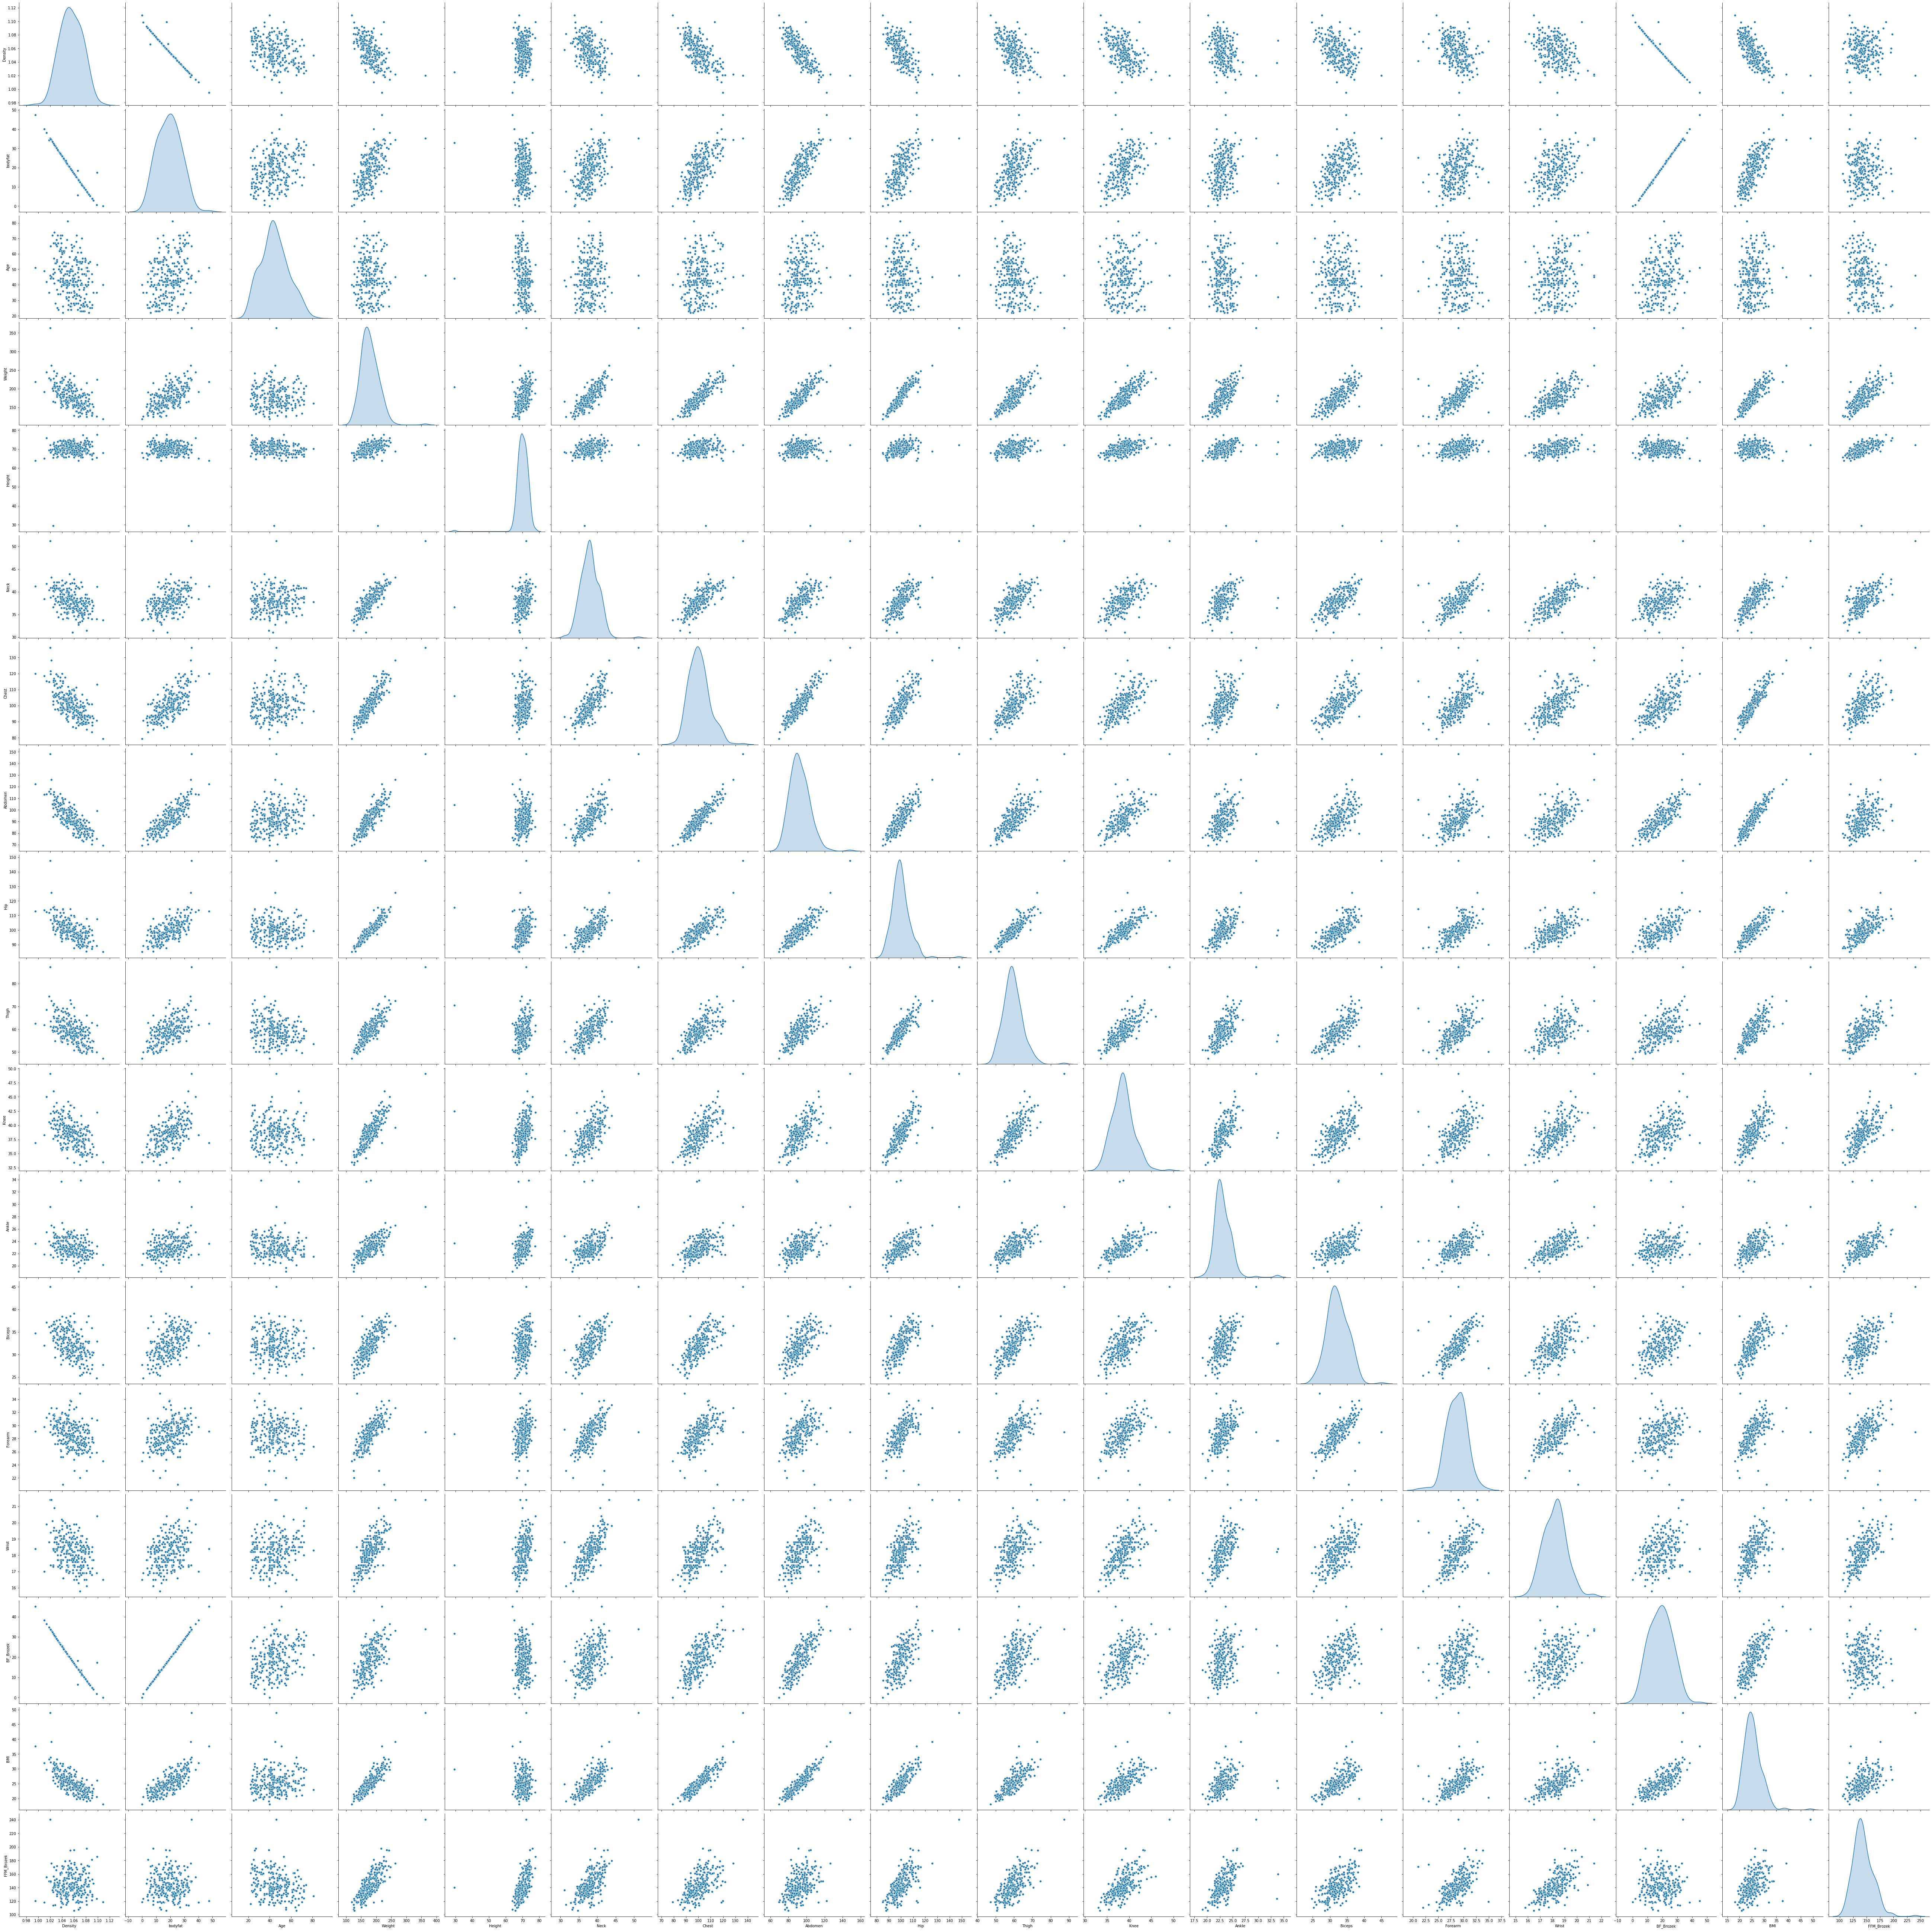

In [94]:
sn.pairplot(df, diag_kind = 'kde', height=4);
plt.show();

In [ ]:
# Ankle greater than 30 (2 samples have much larger ankles than even the heaviest weighing sample)
# FFM larger than 220 (extreme outlier)

In [357]:
print(df[df['Ankle'] > 30] #30, 85, 
    df[df['FFM_Brozek'] > 220] #38,
    df[df['Age'] > 80] #78 (out of population sample),
    df[df['Brozek'] < 3] #181, 171 (cannot live with less than 2-5% BF and these men are older)
    df[df['Height'] < 60] #41 (unrealistic height)
    df[df['Weight'] > 300] #38 (extremely obese, out of population sample))

SyntaxError: invalid syntax (<ipython-input-357-6542b47f2cc7>, line 2)

In [ ]:
#Function to frame all samples for review
def review(list, df, combined_df):
    z = set(list)
    for x in z:
        a = df.loc[x]
        b = pd.DataFrame(a)
        review_df = review_df.concat(b)
    return review_df

In [35]:
#Remove density outliers
df[df['Density'] > 1.09] #181

Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
25    1.0911   27  159.25   71.50  35.7   89.6     79.7   96.5   55.0  36.7   
28    1.0910   27  133.25   64.75  36.4   93.5     73.9   88.5   50.1  34.5   
49    1.0903   47  127.50   66.75  34.0   83.4     70.4   87.2   50.6  34.4   
54    1.0906   42  136.25   67.50  37.8   87.6     77.6   88.6   51.9  34.9   
95    1.0991   53  224.50   77.75  41.1  113.2     99.2  107.5   61.7  42.3   
170   1.0926   35  152.25   67.75  37.0   92.2     81.9   92.8   54.7  36.2   
171   1.0983   35  125.75   65.50  34.0   90.8     75.0   89.2   50.0  34.8   
181   1.1089   40  118.50   68.00  33.8   79.3     69.4   85.0   47.2  33.5   

     Ankle  Biceps  Forearm  Wrist  BF_Brozek   BMI  FFM_Brozek  Error  
25    22.5    29.9     28.2   17.7        4.6  21.9       151.9  13.22  
28    21.3    30.5     27.9   17.2        4.7  22.4       127.0  15.60  
49    21.9    26.8     25.8   16.8        5.0  20.2       121.2  16.17  
54    22.5    27.7     27.5   18.5        4.9  21.1       129.6  13.05  
95    23.2    32.9     30.8   20.4       17.3  26.1       185.7  -6.35  
170   22.1    30.4     27.4   17.7        4.1  23.4       146.1  14.36  
171   22.0    24.8     25.9   16.9        1.9  20.6       123.4  19.84  
181   20.2    27.7     24.6   16.5        0.0  18.1       118.5  20.75

In [14]:
## 171 and 181 have estimated bf percentages lower than 2%, which is required for life. I can either remove these as inaccurate or test a model 
## increasing the estimate bf by 2 for all. I would like to find the measurements responsible for the inaccuracies and maybe remove or alter
## them for a model.

In [15]:
## Should I remove the two Obese measurements? With there only being 2 will it negatively impact my model?

In [16]:
## check all density within a certain range

## Feature Engineering

In [291]:
## the formula used by the DoD is 86.010 x log10(abdomen - neck) - 70.041 x log10(height) + 36.76
# Creating a copy dataset only including the 3 variables used in the DOD measurement 
# Im going to change the measurements to inches for the equation
df3 = df[['Height', 'Neck', 'Abdomen']].copy()

df3['Neck'] = df3['Neck'] * 0.393701
df3['Abdomen'] = df3['Abdomen'] * 0.393701

df3

Height       Neck    Abdomen
0     67.75  14.251976  33.543325
1     72.25  15.157489  32.677183
2     66.25  13.385834  34.606318
3     72.25  14.724417  34.015766
4     71.25  13.543314  39.370100
..      ...        ...        ...
247   67.00  13.740165  32.913404
248   69.75  16.102371  41.338605
249   66.00  15.314969  43.897662
250   70.50  15.314969  39.881911
251   70.00  16.063001  42.716559

[252 rows x 3 columns]

In [292]:
#Using the DoD formula against all samples to create a list of body fat percentages and then adding it as a column to df3

bf = []
ans1 = []
ans2 = []

for x in df3['Height']:
    ans2.append(np.log10(x))

for x in df3['Abdomen']:
    for y in df3['Neck']:
        ans1.append(np.log10(x-y))
        
answers = zip(ans1, ans2)

for x, y in answers:
    bf.append(round(86.010 * x - 70.041 * y + 36.76, 2))
print(bf)

df3['DoD_BF'] = bf
df3['Brozek'] = df['Brozek']
df3

[19.08, 15.32, 21.4, 16.19, 18.89, 13.89, 18.04, 15.77, 14.91, 11.81, 14.39, 13.06, 16.58, 15.02, 14.87, 19.72, 15.53, 12.86, 17.68, 13.58, 16.68, 14.08, 20.57, 18.61, 20.35, 17.82, 19.19, 17.15, 20.3, 18.14, 14.54, 16.7, 16.07, 14.8, 11.81, 18.62, 16.29, 14.06, 3.47, 16.23, 12.87, 44.06, 17.23, 13.16, 22.38, 17.08, 21.12, 18.74, 21.25, 21.17, 18.1, 19.94, 18.85, 17.43, 17.95, 14.29, 16.68, 14.87, 14.33, 18.27, 12.51, 19.2, 16.58, 18.49, 14.98, 15.42, 18.21, 16.9, 17.4, 17.36, 17.97, 16.67, 16.34, 23.03, 19.76, 19.34, 16.34, 16.78, 16.73, 17.48, 17.36, 17.82, 14.47, 16.13, 16.61, 18.96, 18.14, 19.76, 15.62, 16.42, 17.31, 15.94, 16.86, 15.93, 15.34, 10.95, 15.7, 17.69, 19.08, 14.21, 13.5, 16.61, 17.47, 12.9, 15.72, 22.44, 14.72, 11.58, 13.98, 19.9, 17.97, 17.39, 14.9, 18.65, 15.93, 18.33, 16.45, 13.37, 14.75, 15.72, 12.5, 14.83, 18.09, 18.99, 18.48, 19.11, 16.51, 18.07, 13.85, 16.55, 17.97, 17.79, 15.46, 18.29, 18.07, 16.95, 17.14, 15.23, 18.96, 12.3, 16.72, 18.07, 18.07, 17.65, 13.59, 

Height       Neck    Abdomen  DoD_BF  Brozek
0     67.75  14.251976  33.543325   19.08    12.6
1     72.25  15.157489  32.677183   15.32     6.9
2     66.25  13.385834  34.606318   21.40    24.6
3     72.25  14.724417  34.015766   16.19    10.9
4     71.25  13.543314  39.370100   18.89    27.8
..      ...        ...        ...     ...     ...
247   67.00  13.740165  32.913404   20.39    11.5
248   69.75  16.102371  41.338605   14.42    32.3
249   66.00  15.314969  43.897662   17.75    28.3
250   70.50  15.314969  39.881911   15.75    25.3
251   70.00  16.063001  42.716559   14.40    30.7

[252 rows x 5 columns]

In [293]:
# Adding a colummn for the error between actual and DoD measurement
df3['Error'] = df3['DoD_BF'] - df3['Brozek']
df['Error'] = df3['Error']
df

Density  bodyfat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   
1     1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  Brozek   BMI  FFM_Brozek  \
0     59.0  37.3   21.9    32.0     27.4   17.1    12.6  23.7       134.9   
1     58.7  37.3   23.4    30.5     28.9   18.2     6.9  23.4       161.3   
2     59.6  38.9   24.0    28.8     25.2   16.6    24.6  24.7       116.0   
3     60.1  37.3   22.8    32.4     29.4   18.2    10.9  24.9       164.7   
4     63.2  42.2   24.0    32.2     27.7   17.7    27.8  25.6       133.1   
..     ...   ...    ...     ...      ...    ...     ...   ...         ...   
247   49.6  34.8   21.5    25.6     25.7   18.5    11.5  21.1       118.9   
248   59.6  40.8   23.2    35.2     28.6   20.1    32.3  29.1       136.1   
249   60.3  37.3   21.5    31.3     27.2   18.0    28.3  30.2       133.9   
250   56.0  41.6   22.7    30.5     29.4   19.8    25.3  27.0       142.6   
251   59.3  42.2   24.6    33.7     30.0   20.9    30.7  29.8       143.7   

     Siri  Error  
0    12.3   6.48  
1     6.1   8.42  
2    25.3  -3.20  
3    10.4   5.29  
4    28.7  -8.91  
..    ...    ...  
247  11.0   8.89  
248  33.6 -17.88  
249  29.3 -10.55  
250  26.0  -9.55  
251  31.9 -16.30  

[252 rows x 20 columns]

In [18]:
## Creating a column for wrist measurement in inches form centimeters and then to create a column for body frame size based on that measurement. 
## See readme for body frame category measurements

df['Wrist_Inches'] = round(df['Wrist'] * 0.393701,2)

In [19]:
## Creating the frame column

wrist_inches = pd.array(df['Wrist_Inches'])

In [20]:
## Going to use -1 for small, 0 for medium, and 1 for large frames

frame = []

for x in wrist_inches:
    if x > 7.5:
        frame.append(1)
    elif x <= 7.5 and x >= 6.5:
        frame.append(0)
    else:
        frame.append(-1)

In [21]:
## Checking accuracy

len(frame)

252

In [22]:
## adding the frame column
df['Frame'] = DataFrame(frame, columns=['Frame'])

In [23]:
df[df['Frame'] == 1].mean()

Density           1.045043
Age              47.809524
Weight          212.997619
Height           71.845238
Neck             40.985714
Chest           109.850000
Abdomen         103.111905
Hip             106.526190
Thigh            63.580952
Knee             40.902381
Ankle            24.497619
Biceps           35.335714
Forearm          30.338095
Wrist            19.645238
BF_Brozek        23.602381
BMI              28.995238
FFM_Brozek      161.852381
Error           -10.184048
Wrist_Inches      7.735476
Frame             1.000000
dtype: float64

In [24]:
## adding knee in inches column
df['Knee_Inches'] = round(df['Knee'] * 0.393701,2)

In [25]:
# assuming men carry fat mostly in their upper bodies I wonder how the ankle to their thigh, or wrist to abdomen ration
# affects, or ankle to abdomen/hip

In [26]:
#side note i wonder if the breadth/circumference ratio can predict body fat also maybe when flexed (ex. measuring height of
#muscle in bicep in ratio to the circuference around when flexed, breadth of forearm vs circumference) fat would be more circular
#0.5/more muscle would be more oval 

In [27]:
df['HW_ratio'] = round(df['Abdomen'] / df['Hip'], 2)

In [28]:
df['abs_weight'] = round(df['Abdomen'] / df['Weight'], 2)

In [29]:
df['hip_weight'] = round(df['Hip'] / df['Weight'], 2)

In [30]:
df['abs_height'] = round(df['Abdomen'] / df['Height'], 2)

In [31]:
df['thigh_hip'] = round(df['Thigh'] / df['Hip'], 2)

In [32]:
df['thigh_abs'] = round(df['Thigh'] / df['Abdomen'], 2)

In [33]:
df['chest_abs'] = round(df['Chest'] / df['Abdomen'], 2)

In [34]:
df

Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0     1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1     1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2     1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3     1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4     1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   
..       ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
247   1.0736   70  134.25   67.00  34.9   89.2     83.6   88.8   49.6  34.8   
248   1.0236   72  201.00   69.75  40.9  108.5    105.0  104.5   59.6  40.8   
249   1.0328   72  186.75   66.00  38.9  111.1    111.5  101.7   60.3  37.3   
250   1.0399   72  190.75   70.50  38.9  108.3    101.3   97.8   56.0  41.6   
251   1.0271   74  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   

     Ankle  Biceps  Forearm  Wrist  BF_Brozek   BMI  FFM_Brozek  Error  \
0     21.9    32.0     27.4   17.1       12.6  23.7       134.9   6.48   
1     23.4    30.5     28.9   18.2        6.9  23.4       161.3   8.42   
2     24.0    28.8     25.2   16.6       24.6  24.7       116.0  -3.20   
3     22.8    32.4     29.4   18.2       10.9  24.9       164.7   5.29   
4     24.0    32.2     27.7   17.7       27.8  25.6       133.1  -8.91   
..     ...     ...      ...    ...        ...   ...         ...    ...   
247   21.5    25.6     25.7   18.5       11.5  21.1       118.9   8.89   
248   23.2    35.2     28.6   20.1       32.3  29.1       136.1 -17.88   
249   21.5    31.3     27.2   18.0       28.3  30.2       133.9 -10.55   
250   22.7    30.5     29.4   19.8       25.3  27.0       142.6  -9.55   
251   24.6    33.7     30.0   20.9       30.7  29.8       143.7 -16.30   

     Wrist_Inches  Frame  Knee_Inches  HW_ratio  abs_weight  hip_weight  \
0            6.73      0        14.69      0.90        0.55        0.61   
1            7.17      0        14.69      0.84        0.48        0.57   
2            6.54      0        15.31      0.89        0.57        0.64   
3            7.17      0        14.69      0.85        0.47        0.55   
4            6.97      0        16.61      0.98        0.54        0.55   
..            ...    ...          ...       ...         ...         ...   
247          7.28      0        13.70      0.94        0.62        0.66   
248          7.91      1        16.06      1.00        0.52        0.52   
249          7.09      0        14.69      1.10        0.60        0.54   
250          7.80      1        16.38      1.04        0.53        0.51   
251          8.23      1        16.61      1.01        0.52        0.52   

     abs_height  thigh_hip  thigh_abs  chest_abs  
0          1.26       0.62       0.69       1.09  
1          1.15       0.59       0.71       1.13  
2          1.33       0.60       0.68       1.09  
3          1.20       0.59       0.70       1.18  
4          1.40       0.62       0.63       0.97  
..          ...        ...        ...        ...  
247        1.25       0.56       0.59       1.07  
248        1.51       0.57       0.57       1.03  
249        1.69       0.59       0.54       1.00  
250        1.44       0.57       0.55       1.07  
251        1.55       0.55       0.55       1.04  

[252 rows x 28 columns]

## Analysis

In [15]:
# printing descriptive statistics on DOD BF ERROR for PPoint
print(abs(df3['Error']).mean())
print(abs(df3['Error']).min())
print(abs(df3['Error']).max())

7.641507936507936
0.030000000000001137
30.33


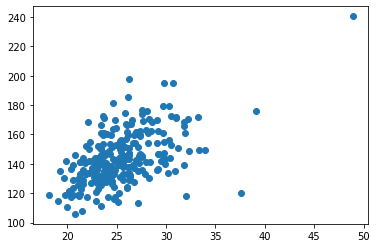

In [35]:
# correlation of BMI to FFM
plt.scatter(df['BMI'], df['FFM_Brozek'])

In [124]:
#Removing the one outlier extremely obese
df.drop(38, axis=0, inplace=True)

In [125]:
df[(df['Error'] < -8)]

Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
4     1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   
16    1.0333   34  195.75   71.00  38.9  101.9     96.4  105.2   64.8  40.8   
17    1.0468   32  209.25   71.00  42.1  107.6     97.5  107.0   66.9  40.0   
34    1.0263   41  247.25   73.50  42.1  117.0    115.6  116.1   71.2  43.3   
35    1.0101   49  191.75   65.00  38.4  118.5    113.1  113.8   61.9  38.3   
..       ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
246   1.0308   69  215.50   70.50  40.8  113.7    107.6  110.0   63.3  44.0   
248   1.0236   72  201.00   69.75  40.9  108.5    105.0  104.5   59.6  40.8   
249   1.0328   72  186.75   66.00  38.9  111.1    111.5  101.7   60.3  37.3   
250   1.0399   72  190.75   70.50  38.9  108.3    101.3   97.8   56.0  41.6   
251   1.0271   74  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   

     Ankle  Biceps  Forearm  Wrist  BF_Brozek   BMI  FFM_Brozek  Error  \
4     24.0    32.2     27.7   17.7       27.8  25.6       133.1  -8.91   
16    23.1    36.2     30.8   17.3       28.1  27.3       140.8 -12.57   
17    24.4    38.2     31.6   19.3       22.4  29.2       162.5  -9.54   
34    26.3    37.3     31.7   19.7       31.1  32.2       170.4 -19.29   
35    21.9    32.0     29.8   17.0       38.2  32.0       118.4 -19.58   
..     ...     ...      ...    ...        ...   ...         ...    ...   
246   22.6    37.5     32.6   18.8       29.1  30.5       152.7 -14.92   
248   23.2    35.2     28.6   20.1       32.3  29.1       136.1 -17.88   
249   21.5    31.3     27.2   18.0       28.3  30.2       133.9 -10.55   
250   22.7    30.5     29.4   19.8       25.3  27.0       142.6  -9.55   
251   24.6    33.7     30.0   20.9       30.7  29.8       143.7 -16.30   

     Wrist_Inches  Frame  Knee_Inches  HW_ratio  abs_weight  hip_weight  \
4            6.97      0        16.61      0.98        0.54        0.55   
16           6.81      0        16.06      0.92        0.49        0.54   
17           7.60      1        15.75      0.91        0.47        0.51   
34           7.76      1        17.05      1.00        0.47        0.47   
35           6.69      0        15.08      0.99        0.59        0.59   
..            ...    ...          ...       ...         ...         ...   
246          7.40      0        17.32      0.98        0.50        0.51   
248          7.91      1        16.06      1.00        0.52        0.52   
249          7.09      0        14.69      1.10        0.60        0.54   
250          7.80      1        16.38      1.04        0.53        0.51   
251          8.23      1        16.61      1.01        0.52        0.52   

     abs_height  thigh_hip  thigh_abs  chest_abs  
4          1.40       0.62       0.63       0.97  
16         1.36       0.62       0.67       1.06  
17         1.37       0.63       0.69       1.10  
34         1.57       0.61       0.62       1.01  
35         1.74       0.54       0.55       1.05  
..          ...        ...        ...        ...  
246        1.53       0.58       0.59       1.06  
248        1.51       0.57       0.57       1.03  
249        1.69       0.59       0.54       1.00  
250        1.44       0.57       0.55       1.07  
251        1.55       0.55       0.55       1.04  

[66 rows x 28 columns]

In [126]:
df[(df['Error'] > -8) & (df['Error'] < 8)]

Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0     1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
2     1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3     1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
5     1.0502   24  210.25   74.75  39.0  104.5     94.4  107.8   66.0  42.0   
6     1.0549   26  181.00   69.75  36.4  105.1     90.7  100.3   58.4  38.3   
..       ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
233   1.0384   58  161.75   67.25  35.1   94.9     94.9  100.2   56.8  35.9   
235   1.0563   62  168.75   67.50  38.3  104.7     95.6   93.7   54.4  37.1   
238   1.0705   64  155.25   69.50  37.9   95.8     82.8   94.5   61.2  39.1   
240   1.0599   65  127.50   65.75  34.7   93.0     79.7   87.6   50.7  33.4   
245   1.0641   68  155.50   69.25  36.3   97.4     84.3   94.4   54.3  37.5   

     Ankle  Biceps  Forearm  Wrist  BF_Brozek   BMI  FFM_Brozek  Error  \
0     21.9    32.0     27.4   17.1       12.6  23.7       134.9   6.48   
2     24.0    28.8     25.2   16.6       24.6  24.7       116.0  -3.20   
3     22.8    32.4     29.4   18.2       10.9  24.9       164.7   5.29   
5     25.6    35.7     30.6   18.8       20.6  26.5       167.0  -6.71   
6     22.9    31.9     27.8   17.7       19.0  26.2       146.6  -0.96   
..     ...     ...      ...    ...        ...   ...         ...    ...   
233   21.0    27.8     26.1   17.6       25.9  25.2       119.9  -5.77   
235   22.7    30.3     26.3   18.3       18.4  26.1       137.6  -0.85   
238   22.3    29.8     28.9   18.3       12.7  22.6       135.5   4.28   
240   20.1    28.5     24.8   16.5       17.0  20.8       105.9   4.11   
245   22.6    29.2     27.3   18.5       15.3  22.8       131.8   3.03   

     Wrist_Inches  Frame  Knee_Inches  HW_ratio  abs_weight  hip_weight  \
0            6.73      0        14.69      0.90        0.55        0.61   
2            6.54      0        15.31      0.89        0.57        0.64   
3            7.17      0        14.69      0.85        0.47        0.55   
5            7.40      0        16.54      0.88        0.45        0.51   
6            6.97      0        15.08      0.90        0.50        0.55   
..            ...    ...          ...       ...         ...         ...   
233          6.93      0        14.13      0.95        0.59        0.62   
235          7.20      0        14.61      1.02        0.57        0.56   
238          7.20      0        15.39      0.88        0.53        0.61   
240          6.50      0        13.15      0.91        0.63        0.69   
245          7.28      0        14.76      0.89        0.54        0.61   

     abs_height  thigh_hip  thigh_abs  chest_abs  
0          1.26       0.62       0.69       1.09  
2          1.33       0.60       0.68       1.09  
3          1.20       0.59       0.70       1.18  
5          1.26       0.61       0.70       1.11  
6          1.30       0.58       0.64       1.16  
..          ...        ...        ...        ...  
233        1.41       0.57       0.60       1.00  
235        1.42       0.58       0.57       1.10  
238        1.19       0.65       0.74       1.16  
240        1.21       0.58       0.64       1.17  
245        1.22       0.58       0.64       1.16  

[150 rows x 28 columns]

In [127]:
# Findings DoD underestimates low h/r and bmi, weight values 
# Dod overestimations have bmis higher than __ and h/r higher than __
# dod scores well on bmis around 24-26 and h/r 
# thigh/abs, chest/abs, biceps/abs all play a role
# men with higher actual BF than DOD had larger thighs 
# lower actual BFs had smaller thighs
# everything in ratio to abs (abs smaller = lower bf, abs equal = higher bf, abs bigger = lower bf )
# abdomen to wieght? low body fat will have a small waist but higher wieght and higher bf will have a larger waist with larger weight
# same with hips to weight depending on their waist to hip ratio

In [128]:
#heatmap/correlation
corr = abs(df.corr(method='pearson')) > 0.8
corr

Density    Age  Weight  Height   Neck  Chest  Abdomen    Hip  \
Density          True  False   False   False  False  False     True  False   
Age             False   True   False   False  False  False    False  False   
Weight          False  False    True   False   True   True     True   True   
Height          False  False   False    True  False  False    False  False   
Neck            False  False    True   False   True  False    False  False   
Chest           False  False    True   False  False   True     True   True   
Abdomen          True  False    True   False  False   True     True   True   
Hip             False  False    True   False  False   True     True   True   
Thigh           False  False    True   False  False  False    False   True   
Knee            False  False    True   False  False  False    False   True   
Ankle           False  False   False   False  False  False    False  False   
Biceps          False  False   False   False  False  False    False  False   
Forearm         False  False   False   False  False  False    False  False   
Wrist           False  False   False   False  False  False    False  False   
BF_Brozek        True  False   False   False  False  False     True  False   
BMI             False  False    True   False  False   True     True   True   
FFM_Brozek      False  False   False   False  False  False    False  False   
Error            True  False   False   False  False  False     True  False   
Wrist_Inches    False  False   False   False  False  False    False  False   
Frame           False  False   False   False  False  False    False  False   
Knee_Inches     False  False    True   False  False  False    False   True   
HW_ratio        False  False   False   False  False  False     True  False   
abs_weight      False  False   False   False  False  False    False  False   
hip_weight      False  False    True   False   True   True     True  False   
abs_height      False  False   False   False  False  False    False  False   
thigh_hip       False  False   False   False  False  False    False  False   
thigh_abs       False  False   False   False  False  False    False  False   
chest_abs       False  False   False   False  False  False    False  False   

              Thigh   Knee  Ankle  Biceps  Forearm  Wrist  BF_Brozek    BMI  \
Density       False  False  False   False    False  False       True  False   
Age           False  False  False   False    False  False      False  False   
Weight         True   True  False   False    False  False      False   True   
Height        False  False  False   False    False  False      False  False   
Neck          False  False  False   False    False  False      False  False   
Chest         False  False  False   False    False  False      False   True   
Abdomen       False  False  False   False    False  False       True   True   
Hip            True   True  False   False    False  False      False   True   
Thigh          True  False  False   False    False  False      False  False   
Knee          False   True  False   False    False  False      False  False   
Ankle         False  False   True   False    False  False      False  False   
Biceps        False  False  False    True    False  False      False  False   
Forearm       False  False  False   False     True  False      False  False   
Wrist         False  False  False   False    False   True      False  False   
BF_Brozek     False  False  False   False    False  False       True  False   
BMI           False  False  False   False    False  False      False   True   
FFM_Brozek    False  False  False   False    False  False      False  False   
Error         False  False  False   False    False  False       True  False   
Wrist_Inches  False  False  False   False    False   True      False  False   
Frame         False  False  False   False    False  False      False  False   
Knee_Inches   False   True  False   False    False  False      False  False   
HW_ratio     

In [129]:
#findings - maybe use hip, h/w, neck
## Results - hip/weight, chest/bmi
# we could potentially use the error or FFM as the dependent variable as well to get BF

In [130]:
#Create the df using to model
model_df = df.copy()

In [131]:
#remove density and unecessary columns... correlates with the Brozek score
model_df.drop(['Density', 'Wrist_Inches', 'Knee_Inches', 'FFM_Brozek'], axis=1, inplace=True)

In [132]:
#creating separate df for Error
error_df = model_df.copy()

In [133]:
abs(model_df.corr(method='spearman')) > 0.80

Age  Weight  Height   Neck  Chest  Abdomen    Hip  Thigh   Knee  \
Age          True   False   False  False  False    False  False  False  False   
Weight      False    True   False   True   True     True   True   True   True   
Height      False   False    True  False  False    False  False  False  False   
Neck        False    True   False   True  False    False  False  False  False   
Chest       False    True   False  False   True     True   True  False  False   
Abdomen     False    True   False  False   True     True   True  False  False   
Hip         False    True   False  False   True     True   True   True   True   
Thigh       False    True   False  False  False    False   True   True  False   
Knee        False    True   False  False  False    False   True  False   True   
Ankle       False   False   False  False  False    False  False  False  False   
Biceps      False   False   False  False  False    False  False  False  False   
Forearm     False   False   False  False  False    False  False  False  False   
Wrist       False   False   False  False  False    False  False  False  False   
BF_Brozek   False   False   False  False  False     True  False  False  False   
BMI         False    True   False  False   True     True   True  False  False   
Error       False   False   False  False  False     True  False  False  False   
Frame       False   False   False  False  False    False  False  False  False   
HW_ratio    False   False   False  False  False     True  False  False  False   
abs_weight  False   False   False  False  False    False  False  False  False   
hip_weight  False    True   False   True   True     True   True  False  False   
abs_height  False   False   False  False   True     True  False  False  False   
thigh_hip   False   False   False  False  False    False  False  False  False   
thigh_abs   False   False   False  False  False    False  False  False  False   
chest_abs   False   False   False  False  False    False  False  False  False   

            Ankle  Biceps  Forearm  Wrist  BF_Brozek    BMI  Error  Frame  \
Age         False   False    False  False      False  False  False  False   
Weight      False   False    False  False      False   True  False  False   
Height      False   False    False  False      False  False  False  False   
Neck        False   False    False  False      False  False  False  False   
Chest       False   False    False  False      False   True  False  False   
Abdomen     False   False    False  False       True   True   True  False   
Hip         False   False    False  False      False   True  False  False   
Thigh       False   False    False  False      False  False  False  False   
Knee        False   False    False  False      False  False  False  False   
Ankle        True   False    False  False      False  False  False  False   
Biceps      False    True    False  False      False  False  False  False   
Forearm     False   False     True  False      False  False  False  False   
Wrist       False   False    False   True      False  False  False  False   
BF_Brozek   False   False    False  False       True  False   True  False   
BMI         False   False    False  False      False   True  False  False   
Error       False   False    False  False       True  False   True  False   
Frame       False   False    False  False      False  False  False   True   
HW_ratio    False   False    False  False      False  False  False  False   
abs_weight  False   False    False  False      False  False  False  False   
hip_weight  False   False    False  False      False   True  False  False   
abs_height  False   False    False  False       True   True   True  False   
thigh_hip   False   False    False  False      False  False  False  False   
thigh_abs   False   False    False  False      False  False  False  False   
chest_abs   False   False    False  False      False  False  False  False   

            HW_ratio  abs_weight  hip_weight  abs_height  thig

In [134]:
## How do fat free weight and wrist measurement correlate?
## There is a previous correlation of 0.59 according to attached research paper
## According to the same paper, the knee measurement, which we have, had a correlation of 0.65 to FFM and 0.48 TBF and 0.71 Weight
## If the person has had a recent significant weight loss, using bone measurements would not be as accurate on them

In [135]:
## Remove older samples maybe having a lower bone density? Cannot remove if using previous research paper as they used samples from ages 18-65.


In [136]:
## skin estimated to be 16% of weight and intestines 7.5lbs
## https://www.livescience.com/32939-how-much-does-skin-weigh.html#:~:text=As%20an%20organ%2C%20skin%20is,a%20person's%20total%20body%20weight.&text=Most%20adults'%20skin%20weighs%20in%20at%2020%20pounds%20or%20more.
## other organs 9.3 pounds mean with no correlation to height weight or bmi of man, so the mean is the best fidure to use
## https://journals.lww.com/amjforensicmedicine/Abstract/2012/12000/Normal_Organ_Weights_in_Men__Part_II_The_Brain,.22.aspx#:~:text=The%20following%20reference%20ranges%20(95,the%20presence%20of%20pathologic%20disease.

In [137]:
## group the samples into error rates >8, <-8, 8>-8 -- then find similiarities or patterns

## Preprocessing

### Train/Test/Split

In [138]:
## Split Training and Testing Data
from sklearn.model_selection import train_test_split

BF_df = model_df.copy()
y = BF_df[['BF_Brozek']]
X = BF_df.drop(['BF_Brozek', 'Error'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [139]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [140]:
## Split using Error as the dependent feature

err_y = error_df[['Error']]
err_X = error_df.drop(['Error','BF_Brozek'], axis=1)
err_X_train, err_X_test, err_y_train, err_y_test = train_test_split(err_X, err_y, test_size=0.25, random_state=0)

In [141]:
scale = MinMaxScaler()
err_X_train_scaled = scale.fit_transform(err_X_train)
err_X_test_scaled = scale.transform(err_X_test)

### Feature Selection

#### ERROR

In [142]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

ridge = Ridge(alpha=0.05)
ridge.fit(err_X_train_scaled, err_y_train)

lasso = Lasso(alpha=0.05)
lasso.fit(err_X_train_scaled, err_y_train)

lin = LinearRegression()
lin.fit(err_X_train_scaled, err_y_train)

LinearRegression()

In [145]:
err_y_h_ridge_train = ridge.predict(err_X_train_scaled)
err_y_h_ridge_test = ridge.predict(err_X_test_scaled)

err_y_h_lasso_train = np.reshape(lasso.predict(err_X_train_scaled), (188, 1))
err_y_h_lasso_test = np.reshape(lasso.predict(err_X_test_scaled), (63, 1))

err_y_h_lin_train = lin.predict(err_X_train_scaled)
err_y_h_lin_test = lin.predict(err_X_test_scaled)

In [146]:
print('Train Error Ridge Model', np.sum((err_y_train - err_y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((err_y_test - err_y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((err_y_train - err_y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((err_y_test - err_y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((err_y_train - lin.predict(err_X_train_scaled))**2))
print('Test Error Unpenalized Linear Model', np.sum((err_y_test - lin.predict(err_X_test_scaled))**2))

Train Error Ridge Model Error    2787.181414
dtype: float64
Test Error Ridge Model Error    800.694669
dtype: float64


Train Error Lasso Model Error    3307.373475
dtype: float64
Test Error Lasso Model Error    757.633749
dtype: float64


Train Error Unpenalized Linear Model Error    2727.31885
dtype: float64
Test Error Unpenalized Linear Model Error    826.487376
dtype: float64


In [147]:
print('Ridge parameter coefficients:', ridge.coef_)
print('Lasso parameter coefficients:', lasso.coef_)
print('Linear model parameter coefficients:', lin.coef_)

Ridge parameter coefficients: [[ -4.9546867   10.4140325  -14.09869805  -4.9651985   -8.38767897
  -13.16343043 -13.32740223   5.82869114   2.11569875  -1.65157356
   -2.23443202  -0.61266444  13.75226598  -9.5527737   -3.77979341
   -6.13984557  -1.7831396    9.01723499  13.05719166  -6.4776884
   -0.09438805  10.46160028]]
Lasso parameter coefficients: [ -0.          -0.          -8.47460284  -3.05773505  -0.
 -21.69340969  -0.          -1.66294558  -0.          -0.
  -2.77705906  -0.           0.62731855  -0.          -0.
 -12.37784792   0.           0.73345374   0.          -0.
   0.           3.50723024]
Linear model parameter coefficients: [[ -4.80278111  18.82849368   9.99686338  -5.22215122  -3.93342343
  -45.59588166 -46.14297752  40.9759324    2.06238661  -1.91926796
   -2.42745576  -0.37398801  14.23614512   1.03698916  -4.09115667
   -3.61873123  -5.10903452  21.26860974  39.87341002 -21.16795348
  -10.57577653   6.88124351]]


ridge = Ridge(alpha=0.5)
ridge.fit(err_X_train_scaled, err_y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(err_X_train_scaled, err_y_train)

lin = LinearRegression()
lin.fit(err_X_train_scaled, err_y_train)

In [148]:
# Lassoed features - Weight, Height, Knee, hip/weight, abs/height, thigh/hip, chest/abs

In [149]:
linear_Error = error_df[['Height', 'Knee', 'abs_height', 'thigh_hip', 'chest_abs']]
linear_Error.corr()
# Removed weight and hip_weight due to correlations and lower coefficients

Height      Knee  abs_height  thigh_hip  chest_abs
Height      1.000000  0.287365   -0.564058   0.012258   0.007806
Knee        0.287365  1.000000    0.458326   0.300526  -0.452437
abs_height -0.564058  0.458326    1.000000   0.109365  -0.564864
thigh_hip   0.012258  0.300526    0.109365   1.000000  -0.103995
chest_abs   0.007806 -0.452437   -0.564864  -0.103995   1.000000

In [150]:
err_y = error_df[['Error']]
err_X = error_df[['Height', 'Knee', 'abs_height', 'thigh_hip', 'chest_abs']]
err_X_train, err_X_test, err_y_train, err_y_test = train_test_split(err_X, err_y, test_size=0.25, random_state=0)

In [151]:
scale = MinMaxScaler()
err_X_train_scaled = scale.fit_transform(err_X_train)
err_X_test_scaled = scale.transform(err_X_test)


In [152]:
ridge = Ridge(alpha=0.002)
ridge.fit(err_X_train_scaled, err_y_train)

lasso = Lasso(alpha=0.002)
lasso.fit(err_X_train_scaled, err_y_train)

lin = LinearRegression()
lin.fit(err_X_train_scaled, err_y_train)

LinearRegression()

In [153]:
err_y_h_ridge_train = ridge.predict(err_X_train_scaled)
err_y_h_ridge_test = ridge.predict(err_X_test_scaled)

err_y_h_lasso_train = np.reshape(lasso.predict(err_X_train_scaled), (188, 1))
err_y_h_lasso_test = np.reshape(lasso.predict(err_X_test_scaled), (63, 1))

err_y_h_lin_train = lin.predict(err_X_train_scaled)
err_y_h_lin_test = lin.predict(err_X_test_scaled)

In [154]:
print('Train Error Ridge Model', np.sum((err_y_train - err_y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((err_y_test - err_y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((err_y_train - err_y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((err_y_test - err_y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((err_y_train - lin.predict(err_X_train_scaled))**2))
print('Test Error Unpenalized Linear Model', np.sum((err_y_test - lin.predict(err_X_test_scaled))**2))

Train Error Ridge Model Error    5344.822332
dtype: float64
Test Error Ridge Model Error    1131.780843
dtype: float64


Train Error Lasso Model Error    5346.977194
dtype: float64
Test Error Lasso Model Error    1123.23288
dtype: float64


Train Error Unpenalized Linear Model Error    5344.408154
dtype: float64
Test Error Unpenalized Linear Model Error    1135.316719
dtype: float64


In [157]:
#Linear regression test and training score
print('Training r^2:', lin.score(err_X_train_scaled, err_y_train))
print('Test r^2:', lin.score(err_X_test_scaled, err_y_test))

Training r^2: 0.665333523845538
Test r^2: 0.6904188988769036


#### Bodyfat

In [76]:
ridge = Ridge(alpha=0.05)
ridge.fit(X_train_scaled, y_train)

lasso = Lasso(alpha=0.05)
lasso.fit(X_train_scaled, y_train)

lin = LinearRegression()
lin.fit(X_train_scaled, y_train)

LinearRegression()

In [77]:
y_h_ridge_train = ridge.predict(X_train_scaled)
y_h_ridge_test = ridge.predict(X_test_scaled)

y_h_lasso_train = np.reshape(lasso.predict(X_train_scaled), (189, 1))
y_h_lasso_test = np.reshape(lasso.predict(X_test_scaled), (63, 1))

y_h_lin_train = lin.predict(X_train_scaled)
y_h_lin_test = lin.predict(X_test_scaled)

In [78]:
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train_scaled))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test_scaled))**2))

Train Error Ridge Model BF_Brozek    2845.410972
dtype: float64
Test Error Ridge Model BF_Brozek    1388.145217
dtype: float64


Train Error Lasso Model BF_Brozek    3205.066565
dtype: float64
Test Error Lasso Model BF_Brozek    1826.632883
dtype: float64


Train Error Unpenalized Linear Model BF_Brozek    2771.406651
dtype: float64
Test Error Unpenalized Linear Model BF_Brozek    5086.430783
dtype: float64


In [79]:
print('Ridge parameter coefficients:', ridge.coef_)
print('Lasso parameter coefficients:', lasso.coef_)
print('Linear model parameter coefficients:', lin.coef_)

Ridge parameter coefficients: [[  3.33772105 -17.52703753  -0.02537731  -7.49021146  11.09972522
    8.25351403   7.99525641  -0.31495773   0.69458825   5.05436496
    3.61929104   3.73889856 -10.03055142  -1.20593153   3.19223908
   10.5652069    0.84737092  -5.5350267   14.22209669   0.37113138
    4.03473694  -9.0190976 ]]
Lasso parameter coefficients: [ 0.          0.          0.         -0.          2.31317547  0.
  0.          0.          0.          0.          1.19829854  0.
 -0.75679207  0.         -0.         12.07300277 -0.         -0.
 18.97960941  0.73187498 -0.         -6.35761723]
Linear model parameter coefficients: [[  2.96753599 -86.41310412   1.82528941  -5.35237514   5.27377186
   69.76903833  53.32677811 -30.89641079   0.34582533   6.13722046
    4.49634179   3.76576069 -10.27365068  31.3629754    4.15237445
   19.17366437  -0.29662933 -10.41903665 -29.154805     5.37280133
   13.43774996  -4.61287661]]


In [ ]:
# Lasso Features - Chest, Biceps, Wrist, H/W ratio, abs/height, thigh/hip, chest/abs

In [95]:
linear_BF = BF_df[['Biceps', 'Wrist', 'HW_ratio', 'abs_height', 'thigh_hip', 'chest_abs']]
linear_BF.corr()


Biceps     Wrist  HW_ratio  abs_height  thigh_hip  chest_abs
Biceps      1.000000  0.632126  0.407052    0.450205   0.350884  -0.346606
Wrist       0.632126  1.000000  0.411600    0.332040   0.101015  -0.315118
HW_ratio    0.407052  0.411600  1.000000    0.613310   0.040265  -0.692627
abs_height  0.450205  0.332040  0.613310    1.000000   0.104214  -0.583458
thigh_hip   0.350884  0.101015  0.040265    0.104214   1.000000  -0.099831
chest_abs  -0.346606 -0.315118 -0.692627   -0.583458  -0.099831   1.000000

In [96]:
z = err_X['Abdomen']
d = err_y['Error']

In [97]:
cor_matrix = np.corrcoef(z, d)
print(cor_matrix[0,1])

-0.8752569064386132


## Modeling

In [86]:
x_col = list(X.columns)

In [87]:
from statsmodels.formula.api import ols


# Fitting the actual model
for x in x_col:
    predictors = x
    outcome = 'BF_Brozek'
    formula = outcome + '~' + predictors
    model = ols(formula=formula, data=BF_df).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              BF_Brozek   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     22.81
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           3.04e-06
Time:                        08:36:36   Log-Likelihood:                -862.11
No. Observations:                 252   AIC:                             1728.
Df Residuals:                     250   BIC:                             1735.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9555      1.736      6.312      0.0

                            OLS Regression Results                            
Dep. Variable:              BF_Brozek   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     374.7
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           1.25e-51
Time:                        08:36:36   Log-Likelihood:                -757.72
No. Observations:                 252   AIC:                             1519.
Df Residuals:                     250   BIC:                             1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.4911      4.888    -15.444      0.0

In [158]:
# Fitting the actual model
for x in x_col:
    predictors = x
    outcome = 'Error'
    formula = outcome + '~' + predictors
    model = ols(formula=formula, data=error_df).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Error   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     16.05
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           8.15e-05
Time:                        11:55:32   Log-Likelihood:                -895.55
No. Observations:                 251   AIC:                             1795.
Df Residuals:                     249   BIC:                             1802.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5577      2.010      2.764      0.0

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
                            OLS Regression Results                            
Dep. Variable:                  Error   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     34.49
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           1.36e-08
Time:                        11:55:32   Log-Likelihood:                -887.11
No. Observations:                 251   AIC:                             1778.
Df Residuals:                     249   BIC:                             1785.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  Error   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     6.666
Date:                Mon, 02 Nov 2020   Prob (F-statistic):             0.0104
Time:                        11:55:32   Log-Likelihood:                -900.07
No. Observations:                 251   AIC:                             1804.
Df Residuals:                     249   BIC:                             1811.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.6827     13.908      2.422      0.0

In [98]:
predictors = '+'.join(['Biceps', 'Wrist', 'HW_ratio', 'abs_height', 'thigh_hip', 'chest_abs'])
outcome = 'BF_Brozek'
formula = outcome + '~' + predictors
model = ols(formula=formula, data=BF_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              BF_Brozek   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     99.73
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           6.69e-63
Time:                        10:13:35   Log-Likelihood:                -717.36
No. Observations:                 252   AIC:                             1449.
Df Residuals:                     245   BIC:                             1473.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5673     15.137     -1.293      0.1

In [159]:
predictors = '+'.join(['Height', 'Knee', 'abs_height', 'thigh_hip', 'chest_abs'])
outcome = 'Error'
formula = outcome + '~' + predictors
model = ols(formula=formula, data=error_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Error   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     101.0
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           1.68e-57
Time:                        11:55:44   Log-Likelihood:                -762.94
No. Observations:                 251   AIC:                             1538.
Df Residuals:                     245   BIC:                             1559.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.6976     20.335      5.640      0.0

In [160]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Xv = model_df[x_col].drop(['Height', 'Age', 'Frame', 'Thigh', 'hip_weight', 'thigh_abs', 'Abdomen', 'Hip', 'Weight', 'abs_weight', 'thigh_hip', 'Wrist', 'Neck', 'Knee', 'Chest', 'Forearm'], axis=1)
vif = [variance_inflation_factor(Xv.values, i) for i in range(Xv.shape[1])]
list(zip(Xv.columns, vif))

[('Ankle', 241.61636261800896),
 ('Biceps', 275.2774659063487),
 ('BMI', 273.26181488993274),
 ('HW_ratio', 314.36807891212055),
 ('abs_height', 98.62633511340906),
 ('chest_abs', 186.4491279614059)]

### Linear Regresssion

In [341]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg_all = LinearRegression()
linreg_all.fit(X_train, y_train)

print('Training r^2:', linreg_all.score(X_train, y_train))
print('Test r^2:', linreg_all.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg_all.predict(X_train)))
print('Test MSE:', mean_squared_error(y_test, linreg_all.predict(X_test)))

Training r^2: 0.7536385944272503
Test r^2: 0.767215360634987
Training MSE: 14.222459208865304
Test MSE: 14.120559039998218


In [342]:
linreg_preds = linreg_all.predict(X_test)


In [340]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg_all = LinearRegression()
linreg_all.fit(err_X_train, err_y_train)

print('Training r^2:', linreg_all.score(err_X_train, err_y_train))
print('Test r^2:', linreg_all.score(err_X_test, err_y_test))
print('Training MSE:', mean_squared_error(err_y_train, linreg_all.predict(err_X_train)))
print('Test MSE:', mean_squared_error(err_y_test, linreg_all.predict(err_X_test)))

Training r^2: 0.6988480396089667
Test r^2: 0.710376031035377
Training MSE: 24.708878402168448
Test MSE: 18.39350358231908


### Random Forest Regressor

In [161]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

In [162]:
RandomForestRegressor(max_depth=6, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=150)

RandomForestRegressor(max_depth=6, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=150)

In [163]:
tree_clf = RandomForestRegressor(n_estimators=150, max_depth=6, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=0) 
tree_clf.fit(err_X_train, err_y_train)

C:\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=6, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=150, random_state=0)

In [164]:
y_pred = tree_clf.predict(err_X_test)
y_pred

array([ -9.27788802,  -1.42502657,  -7.11671199,  -4.28462652,
         7.20227273,   3.06280356,  -1.77586334, -10.37423812,
       -16.57297037,   6.87730904, -15.54381604,   2.75229565,
        -4.88792322,  -6.58284147,  -0.10510183,   4.45045951,
        -5.94729031, -12.88609217,  -9.62526012,  -1.17660401,
        11.77718814,  11.98865865, -10.69488722,  -6.3963186 ,
        -0.75149655,  -4.22921353,   5.66093386, -12.5909506 ,
       -14.09508278,  -9.14989757,  -5.98827397,  -5.53388893,
       -13.51638714,   0.75281282,   6.60441229,   1.55986287,
        -8.1180408 ,  -2.56775442,   9.81251753,  10.29274427,
         4.16456146,  -2.08787031,   6.47788026,  -7.79440029,
        -6.22380591,  -0.46794939,  -2.12648797,   6.2675328 ,
        -9.38859709,  12.51802415,   7.66839607,  -4.71861516,
         6.05296377,   6.89363705,  -9.5190206 ,  -0.04823656,
        -8.29402257,  -1.38208859, -10.82363481,  -5.96991041,
        -3.86629535,   7.35323705,   2.25124269])

In [165]:
mse = mean_squared_error(err_y_test, y_pred)
r2 = r2_score(err_y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)
print(r2)

4.140428126206922
0.7054978587313048


In [166]:
tree_clf.feature_importances_

array([0.06975104, 0.1069121 , 0.61973196, 0.02205738, 0.18154753])

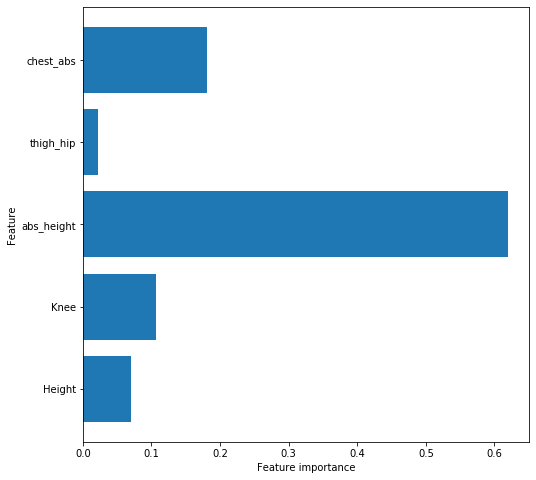

In [167]:
def plot_feature_importances(model):
    n_features = err_X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), err_X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [168]:
# Test set predictions
pred = tree_clf.predict(err_X_test)

# Regression report
print(tree_clf.score(err_X, err_y))


0.8168555003455209


In [169]:
print(tree_clf.get_params)

<bound method BaseEstimator.get_params of RandomForestRegressor(max_depth=6, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=150, random_state=0)>


In [170]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(tree_clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 6,
 'max_features': 3,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [211]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVR

In [283]:
## Split using Error as the dependent feature

err_y = error_df['Error']
err_X = error_df[['Weight', 'Height', 'Knee', 'hip_weight', 'abs_height', 'thigh_hip', 'chest_abs']]
err_X_train, err_X_test, err_y_train, err_y_test = train_test_split(err_X, err_y, test_size=0.2, random_state=0)

In [301]:
param_grid={
            'max_depth': range(3,12),
            'n_estimators': (10, 20, 30, 40, 50, 60, 70, 80, 90),
            'min_samples_split': (2,3,4),
            'bootstrap': [True],
            'max_samples': (30,40),
        },

In [302]:
gsc = GridSearchCV(estimator=RandomForestRegressor(),
        param_grid = param_grid,
        verbose=0, cv=8)

In [303]:
grid_result = gsc.fit(err_X_train, err_y_train)
best_params = grid_result.best_params_
grid_result.best_score_

0.7059260792401608

In [304]:
best_params

{'bootstrap': True,
 'max_depth': 9,
 'max_samples': 40,
 'min_samples_split': 3,
 'n_estimators': 40}

In [225]:
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], min_samples_split=best_params["min_samples_split"], random_state=0, verbose=0)

In [335]:
rfr_cval_score = cross_val_score(rfr, err_X_train, err_y_train, cv=8)
mean_rfr_cval_score = rfr_cval_score.mean()
print(mean_rfr_cval_score)

0.6603029708719035


In [336]:
rfr_errors_predictions = grid_result.predict(err_X_test)
rfr_errors_scores = abs(rfr_errors_predictions - err_y_test)
total_rfr_error = sum(rfr_errors_scores)
max_rfr_error = max(rfr_errors_scores)
print(total_rfr_error)
print(max_rfr_error)

161.39679166666667
8.883583333333334


In [325]:
rfr_errors_predictions = model.predict(err_X_test)
rfr_errors_score = abs(rfr_errors_predictions - err_y_test)
sum(rfr_errors_score)/62
max(rfr_errors_score)

12.050823689918257

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:

#rf = RandomForestRegressor()

#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)

#rf_random.fit(err_X_train, err_y_train)

In [ ]:
#rf_random.best_params_

In [ ]:
# a separate parameter grid with more options, personal use

param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 6, 7, 8],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 150]


### XgB Regressor

In [305]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [315]:
xgbr1 = xgb.XGBRegressor(verbosity=0)
xgbr1.fit(X_train, y_train)
score1 = xgbr1.score(X_train, y_train)
score2 = xgbr1.score(X_test, y_test)
score1

0.9701798612025739

In [307]:
ypred1 = xgbr1.predict(X_test)
mse1 = mean_squared_error(y_test, ypred1)
print("MSE: %.2f" % mse1)

print("RMSE: %.2f" % (mse1*(1/2.0)))

MSE: 18.76
RMSE: 9.38


In [308]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(verbosity=0)


In [309]:
xgbr.fit(err_X_train, err_y_train)

XGBRegressor(verbosity=0)

In [310]:
score = xgbr.score(err_X_train, err_y_train)  
print("Training score: ", score)


Training score:  0.9412701596506431


In [311]:
scores = cross_val_score(xgbr, err_X_train, err_y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.64


In [312]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, err_X_train, err_y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.67


In [313]:
ypred = xgbr.predict(err_X_test)
mse = mean_squared_error(err_y_test, ypred)
print("MSE: %.2f" % mse)

print("RMSE: %.2f" % (mse*(1/2.0)))


MSE: 19.97
RMSE: 9.98


In [ ]:
x_ax = range(len(err_y_test))
plt.plot(x_ax, err_y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Real vs Predicted")
plt.legend()
plt.show()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

%matplotlib inline

In [ ]:
rfc=RandomForestRegressor(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(err_X_train, err_y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
rfc1=RandomForestRegressor(random_state=42, max_features='auto', n_estimators= 200, max_depth=8)
rfc1.fit(err_X_train, err_y_train)

In [ ]:
pred=rfc1.predict(err_X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(err_y_test,pred))